<a href="https://colab.research.google.com/github/rb7488/SIC_Project/blob/main/05_evaluation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Define Base Path

In [2]:
BASE_PATH = "/content/drive/MyDrive/Adaptive_Inference_Project"

#📥 Load Test Data & **Models**

In [3]:
import numpy as np
import joblib

X_test = np.load(f"{BASE_PATH}/processed_data/X_test.npy")
y_test = np.load(f"{BASE_PATH}/processed_data/y_test.npy")

lr_model = joblib.load(f"{BASE_PATH}/models/logistic_regression.pkl")
rf_model = joblib.load(f"{BASE_PATH}/models/random_forest.pkl")

lr_confidence = np.load(f"{BASE_PATH}/confidence_outputs/lr_confidence.npy")

print("All data and models loaded")

All data and models loaded


# Generate Predictions

In [4]:
from sklearn.metrics import accuracy_score

lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

lr_acc = accuracy_score(y_test, lr_preds)
rf_acc = accuracy_score(y_test, rf_preds)

print("LR Accuracy:", lr_acc)
print("RF Accuracy:", rf_acc)

LR Accuracy: 0.9552086868001357
RF Accuracy: 0.9260264675941635


# Adaptive Inference Evaluation

In [5]:
CONFIDENCE_THRESHOLD = 0.8

adaptive_preds = []
model_used = []

for i in range(len(X_test)):
    if lr_confidence[i] >= CONFIDENCE_THRESHOLD:
        adaptive_preds.append(lr_preds[i])
        model_used.append("LR")
    else:
        adaptive_preds.append(rf_preds[i])
        model_used.append("RF")

adaptive_preds = np.array(adaptive_preds)
adaptive_acc = accuracy_score(y_test, adaptive_preds)

print("Adaptive Accuracy:", adaptive_acc)

Adaptive Accuracy: 0.9565659993213438


#Final Accuracy Comparison Table

In [6]:
import pandas as pd

results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Adaptive Inference"],
    "Accuracy": [lr_acc, rf_acc, adaptive_acc]
})

results_df

,Model,Accuracy
0,Logistic Regression,0.955209
1,Random Forest,0.926026
2,Adaptive Inference,0.956566


#Accuracy Comparison Plot

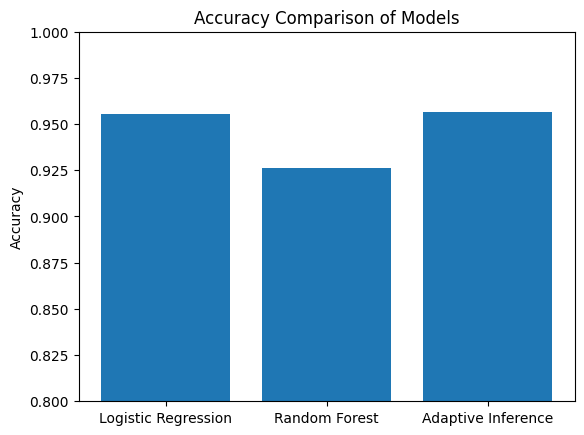

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(results_df["Model"], results_df["Accuracy"])
plt.title("Accuracy Comparison of Models")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.show()

#Computational Efficiency Analysi

In [8]:
from collections import Counter

usage_counts = Counter(model_used)

lr_used = usage_counts["LR"]
rf_used = usage_counts["RF"]

print("Lightweight model used:", lr_used)
print("Complex model used:", rf_used)
print("Lightweight usage %:", (lr_used / len(X_test)) * 100)

Lightweight model used: 2781
Complex model used: 166
Lightweight usage %: 94.36715303698676


#Model Usage Visualization


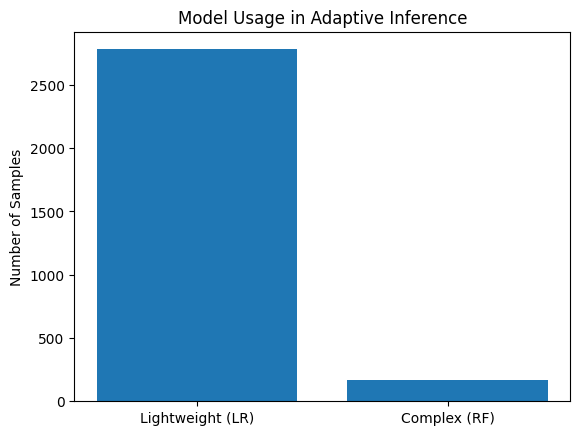

In [9]:
plt.figure()
plt.bar(["Lightweight (LR)", "Complex (RF)"], [lr_used, rf_used])
plt.title("Model Usage in Adaptive Inference")
plt.ylabel("Number of Samples")
plt.show()

#Accuracy vs Computation Trade-off

In [10]:
tradeoff_df = pd.DataFrame({
    "System": ["Random Forest Only", "Adaptive Inference"],
    "Accuracy": [rf_acc, adaptive_acc],
    "Complex Model Usage (%)": [100, (rf_used / len(X_test)) * 100]
})

tradeoff_df

,System,Accuracy,Complex Model Usage (%)
0,Random Forest Only,0.926026,100.000000
1,Adaptive Inference,0.956566,5.632847


#Trade-off Visualization


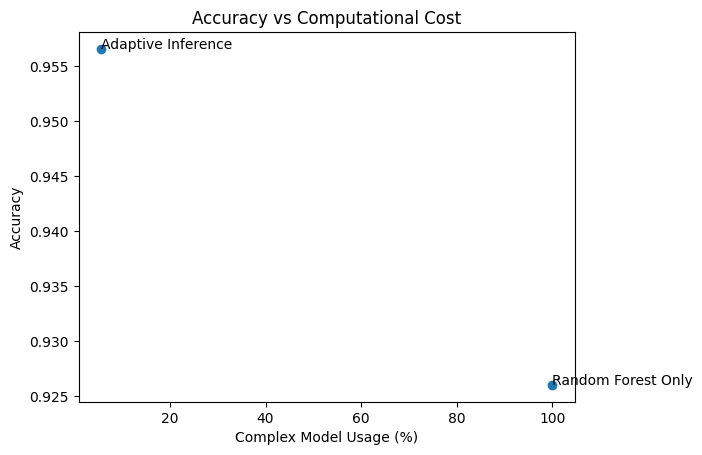

In [11]:
plt.figure()
plt.scatter(tradeoff_df["Complex Model Usage (%)"],
            tradeoff_df["Accuracy"])
for i, txt in enumerate(tradeoff_df["System"]):
    plt.annotate(txt,
                 (tradeoff_df["Complex Model Usage (%)"][i],
                  tradeoff_df["Accuracy"][i]))
plt.xlabel("Complex Model Usage (%)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Computational Cost")
plt.show()

#Save Final Evaluation Results

In [12]:
results_df.to_csv(f"{BASE_PATH}/final_accuracy_results.csv", index=False)
tradeoff_df.to_csv(f"{BASE_PATH}/final_tradeoff_results.csv", index=False)

print("Final evaluation results saved")

Final evaluation results saved
